## Symbolic solution of ODEs with sympy
Intro to sympy variables in previous notebook.

In [2]:
import sympy as sym
sym.init_printing() # for LaTeX formatted output

import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt

In [3]:
# Following is an Ipython magic command that puts figures in the  notebook.
%matplotlib notebook

# M.L. modification of matplotlib defaults
# Changes can also be put in matplotlibrc file, 
# or effected using mpl.rcParams[]
mpl.style.use('classic')
plt.rc('figure', figsize = (6, 4.5))    # Reduces overall size of figures
plt.rc('axes', labelsize=16, titlesize=14)
plt.rc('figure', autolayout = True)     # Adjusts supblot parameters for new size

In [4]:
x = sym.symbols('x') 
f, g = sym.symbols('f g', cls=sym.Function)

In [5]:
f(x)

#### Define the differential equation as a sym.Eq()

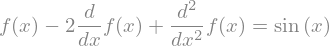

In [6]:
diffeq = sym.Eq(f(x).diff(x, x) - 2*f(x).diff(x) + f(x), sym.sin(x))
diffeq

#### Solve differential equation

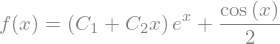

In [7]:
soln = sym.dsolve(diffeq,f(x))
soln

#### Boundary conditions
This isn't implemented yet in `dsolve` -- it's on the "to do" list<br>
For now, solve for contants on your own. For example, if
$$ f(0) = 1\quad\mbox{and}\quad\left.\frac{df}{dx}\right|_0 = 0,  $$
solve the following equations:

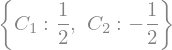

In [8]:
constants = sym.solve([soln.rhs.subs(x,0) - 1, soln.rhs.diff(x,1).subs(x,0)- 0])
constants

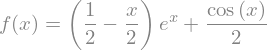

In [9]:
C1, C2 = sym.symbols('C1,C2')
soln = soln.subs(constants)
soln

#### Convert soln to python function for numerical evaluation/plotting
I'm not sure why I had to specify the modulue for conversion of sympy functions.<br>
See http://docs.sympy.org/latest/modules/utilities/lambdify.html<br>
In previous examples, sympy figured out a good module "on its own." 

In [10]:
func = sym.lambdify(x,soln.rhs,'numpy')

<IPython.core.display.Javascript object>


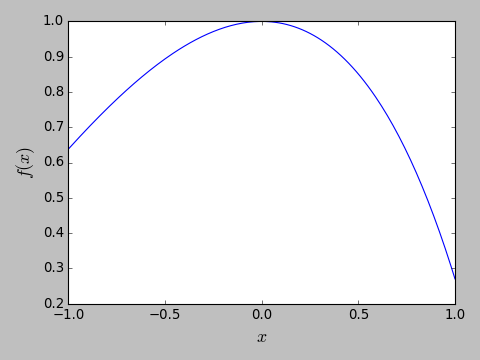

In [11]:
xx = np.linspace(-1,1,201)  # name = xx so it won't collide with symbol x
y = func(xx)
plt.figure()
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.plot(xx,y);

#### Version Information
`version_information` is from J.R. Johansson (jrjohansson at gmail.com); see <a href='http://nbviewer.jupyter.org/github/jrjohansson/scientific-python-lectures/blob/master/Lecture-0-Scientific-Computing-with-Python.ipynb'>Introduction to scientific computing with Python</a> for more information and instructions for package installation.

`version_information` is installed on the linux network at Bucknell

In [12]:
%load_ext version_information

In [13]:
version_information sympy, numpy, matplotlib

Software versions
Python 3.7.7 64bit [GCC 7.3.0]
IPython 7.16.1
OS Linux 3.10.0 1062.9.1.el7.x86_64 x86_64 with centos 7.7.1908 Core
sympy 1.6.1
numpy 1.18.5
matplotlib 3.3.0
Fri Aug 07 15:53:41 2020 EDT